<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Breast-Cancer-Classification/blob/main/BreastCancerEnsemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###INSTALLING PACKAGES

In [ ]:
!pip install --upgrade keras
!pip install -q tensorflow==2.0beta1

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)
     |████████████████████████████████| 87.9MB 65kB/s 
     |████████████████████████████████| 501kB 42.2MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 3.1MB 40.3MB/s 


###LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

###IMPORTING DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/data.csv"
data = pd.read_csv(path)

In [ ]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#DATA PREPROCESSING


In [ ]:
print(data.shape)
data.describe()

(569, 33)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.isnull().sum() #any()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e247f3588>,
      dtype=object)

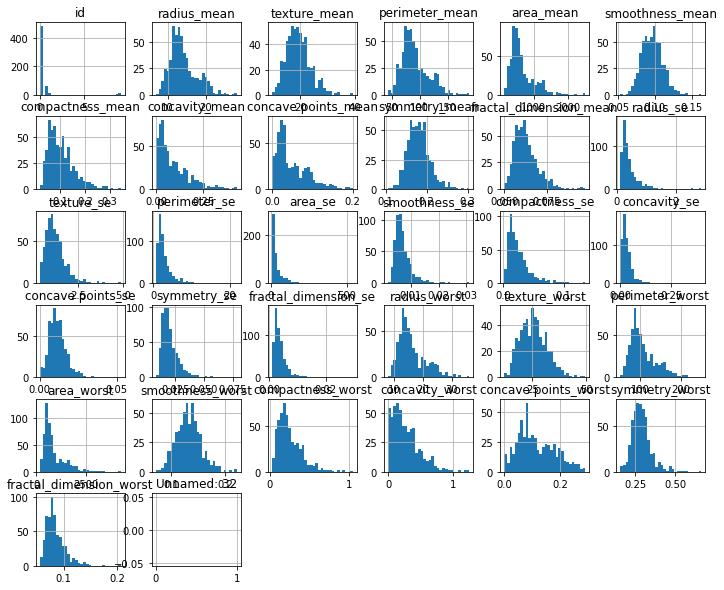

In [ ]:
data.hist(figsize = (12,10), bins=30)

In [ ]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
data = data.set_index('id')
del data['Unnamed: 32']
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [ ]:
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


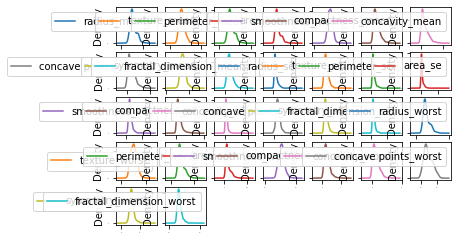

In [ ]:
data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=True, fontsize=1)
plt.show()

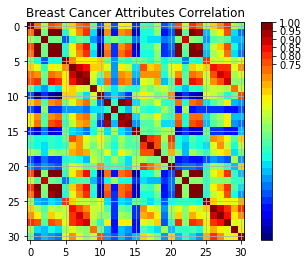

In [ ]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(data.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

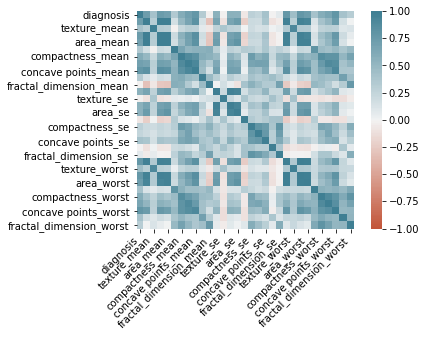

In [ ]:
import seaborn as sns

corr = data.corr()
ax = sns.heatmap(corr, vmin =- 1, vmax = 1, center = 0, 
                  cmap = sns.diverging_palette(20, 220, n=200),
                  square = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

In [ ]:
data.shape

(569, 31)

In [ ]:
train = data[:int(data.shape[0]*0.8)]
test = data[int(data.shape[0]*0.8):]
print("Train: ", train.shape, "Test: ", test.shape)

Train:  (455, 31) Test:  (114, 31)


#DATA SPLITTING

In [ ]:
from imblearn.over_sampling import SMOTE

"""smt = SMOTE()
X_train, Y_train = smt.fit_sample(X_train, Y_train)
print(np.bincount(Y_train))

smt = SMOTE()
X_test, Y_test = smt.fit_sample(X_test, Y_test)
print(np.bincount(Y_train))"""

smt = SMOTE()
X, Y = smt.fit_sample(X, Y)
print(np.bincount(Y))

[357 357]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, stratify = Y, test_size = 0.20, random_state=21)

In [ ]:
print("X_train.shape: ",X_train.shape, "X_test.shape: ",X_test.shape,"Y_train.shape: ", Y_train.shape, "Y_test.shape: ",Y_test.shape)

X_train.shape:  (455, 30) X_test.shape:  (114, 30) Y_train.shape:  (455,) Y_test.shape:  (114,)


In [ ]:
train.to_csv('train.csv')
test.to_csv('test.csv')

"""!cp train.csv "content/drive/My Drive/BreastCancer/"
!cp test.csv "content/drive/My Drive/BreastCancer/""""

cp: cannot create regular file 'content/drive/My Drive/BreastCancer/': No such file or directory
cp: cannot create regular file 'content/drive/My Drive/BreastCancer/': No such file or directory


In [ ]:
from google.colab import files
files.download("train.csv")
files.download("test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#MODELLING

###ENSEMBLE MODELLING USING CROSS VALIDATION

In [ ]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [ ]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

CART: 0.914348 (0.039972) (run time: 0.086663)
SVM: 0.907681 (0.054723) (run time: 0.062157)
NB: 0.940773 (0.033921) (run time: 0.019824)
KNN: 0.927729 (0.055250) (run time: 0.045037)


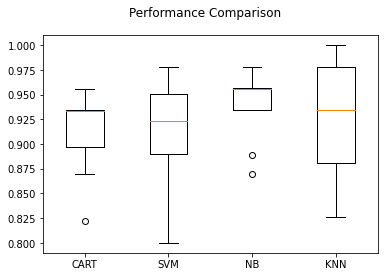

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###PIPELINING

In [ ]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
                                                                        DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
                                                                      GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
                                                                       KNeighborsClassifier())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.907778 (0.037900) (run time: 0.091182)
ScaledSVM: 0.964879 (0.038621) (run time: 0.068861)
ScaledNB: 0.931932 (0.038625) (run time: 0.027956)
ScaledKNN: 0.958357 (0.038595) (run time: 0.058954)


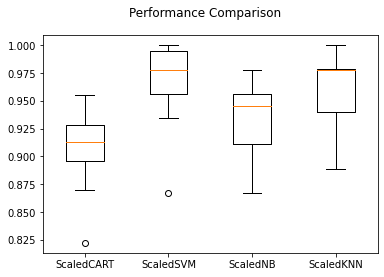

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###SVM

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.969324 using {'C': 2.0, 'kernel': 'rbf'}
0.964976 (0.026211) with: {'C': 0.1, 'kernel': 'linear'}
0.828551 (0.054707) with: {'C': 0.1, 'kernel': 'poly'}
0.940725 (0.038380) with: {'C': 0.1, 'kernel': 'rbf'}
0.949469 (0.032899) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.962754 (0.029531) with: {'C': 0.3, 'kernel': 'linear'}
0.863720 (0.050997) with: {'C': 0.3, 'kernel': 'poly'}
0.956039 (0.032900) with: {'C': 0.3, 'kernel': 'rbf'}
0.960386 (0.029499) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.956184 (0.030988) with: {'C': 0.5, 'kernel': 'linear'}
0.879034 (0.053507) with: {'C': 0.5, 'kernel': 'poly'}
0.964879 (0.030054) with: {'C': 0.5, 'kernel': 'rbf'}
0.956087 (0.027848) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.954010 (0.031644) with: {'C': 0.7, 'kernel': 'linear'}
0.885604 (0.038275) with: {'C': 0.7, 'kernel': 'poly'}
0.967053 (0.037461) with: {'C': 0.7, 'kernel': 'rbf'}
0.949565 (0.027831) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.951836 (0.028830) with: {'C': 0.9, 'kernel': 'linear'

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(grid_result.best_params_['C'], grid_result.best_params_['kernel'])
start = time.time()
model.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.010251


In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(Y_test, predictions))

[[74  1]
 [ 0 39]]


In [ ]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.12%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

"""
Accuracy score 0.991228
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114
"""

Accuracy score 0.991228
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



'\nAccuracy score 0.991228\n              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99        75\n           1       0.97      1.00      0.99        39\n\n    accuracy                           0.99       114\n   macro avg       0.99      0.99      0.99       114\nweighted avg       0.99      0.99      0.99       114\n'

###NB

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_pred = classifier.predict(X_test)
print(Y_test)
print(Y_pred)

['1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1'
 '1' '1' '1' '1' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '0' '1' '0' '0' '0' '1' '1' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '0' '1'
 '0' '1' '1' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1'
 '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0'
 '1' '1' '0' '1' '1' '0']
['1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1'
 '0' '1' '0' '1' '0' '0' '1' '0' '1' '1' '0' '0' '0' '1' '1' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '0' '1'
 '0' '0' '1' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1'
 '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0'
 '0' '0' '0' '1' '1' '0']


In [ ]:
classifier.score(X_test, Y_test)

0.9035087719298246

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[61  6]
 [ 5 42]]


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.35%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, predictions))

"""
Accuracy score 0.903509
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

Accuracy score 0.903509
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114



'\nAccuracy score 0.903509\n              precision    recall  f1-score   support\n\n           0       0.59      0.66      0.62        67\n           1       0.42      0.36      0.39        47\n\n    accuracy                           0.54       114\n   macro avg       0.51      0.51      0.51       114\nweighted avg       0.52      0.54      0.53       114\n'

###DT

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [ ]:
print(X.shape)
print(Y.shape)

(17070, 1)
(569, 1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_classifier.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
Y_pred = DT_classifier.predict(X_test)
print(Y_test)
print(Y_pred)

['1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1'
 '1' '1' '1' '1' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '0' '1' '0' '0' '0' '1' '1' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '0' '1'
 '0' '1' '1' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1'
 '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0'
 '1' '1' '0' '1' '1' '0']
['1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1'
 '1' '1' '1' '1' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0'
 '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '1' '1'
 '0' '0' '1' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1'
 '0' '1' '1' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0'
 '1' '0' '0' '1' '1' '1']


In [ ]:
DT_classifier.score(X_test, Y_test)
DT_classifier.fit(X_test,Y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[62  5]
 [ 3 44]]


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.98%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

"""
Accuracy score 0.929825
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

Accuracy score 0.929825
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



'\nAccuracy score 0.929825\n              precision    recall  f1-score   support\n\n           0       0.59      0.66      0.62        67\n           1       0.42      0.36      0.39        47\n\n    accuracy                           0.54       114\n   macro avg       0.51      0.51      0.51       114\nweighted avg       0.52      0.54      0.53       114\n'

In [ ]:
!pip install pydotplus

In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


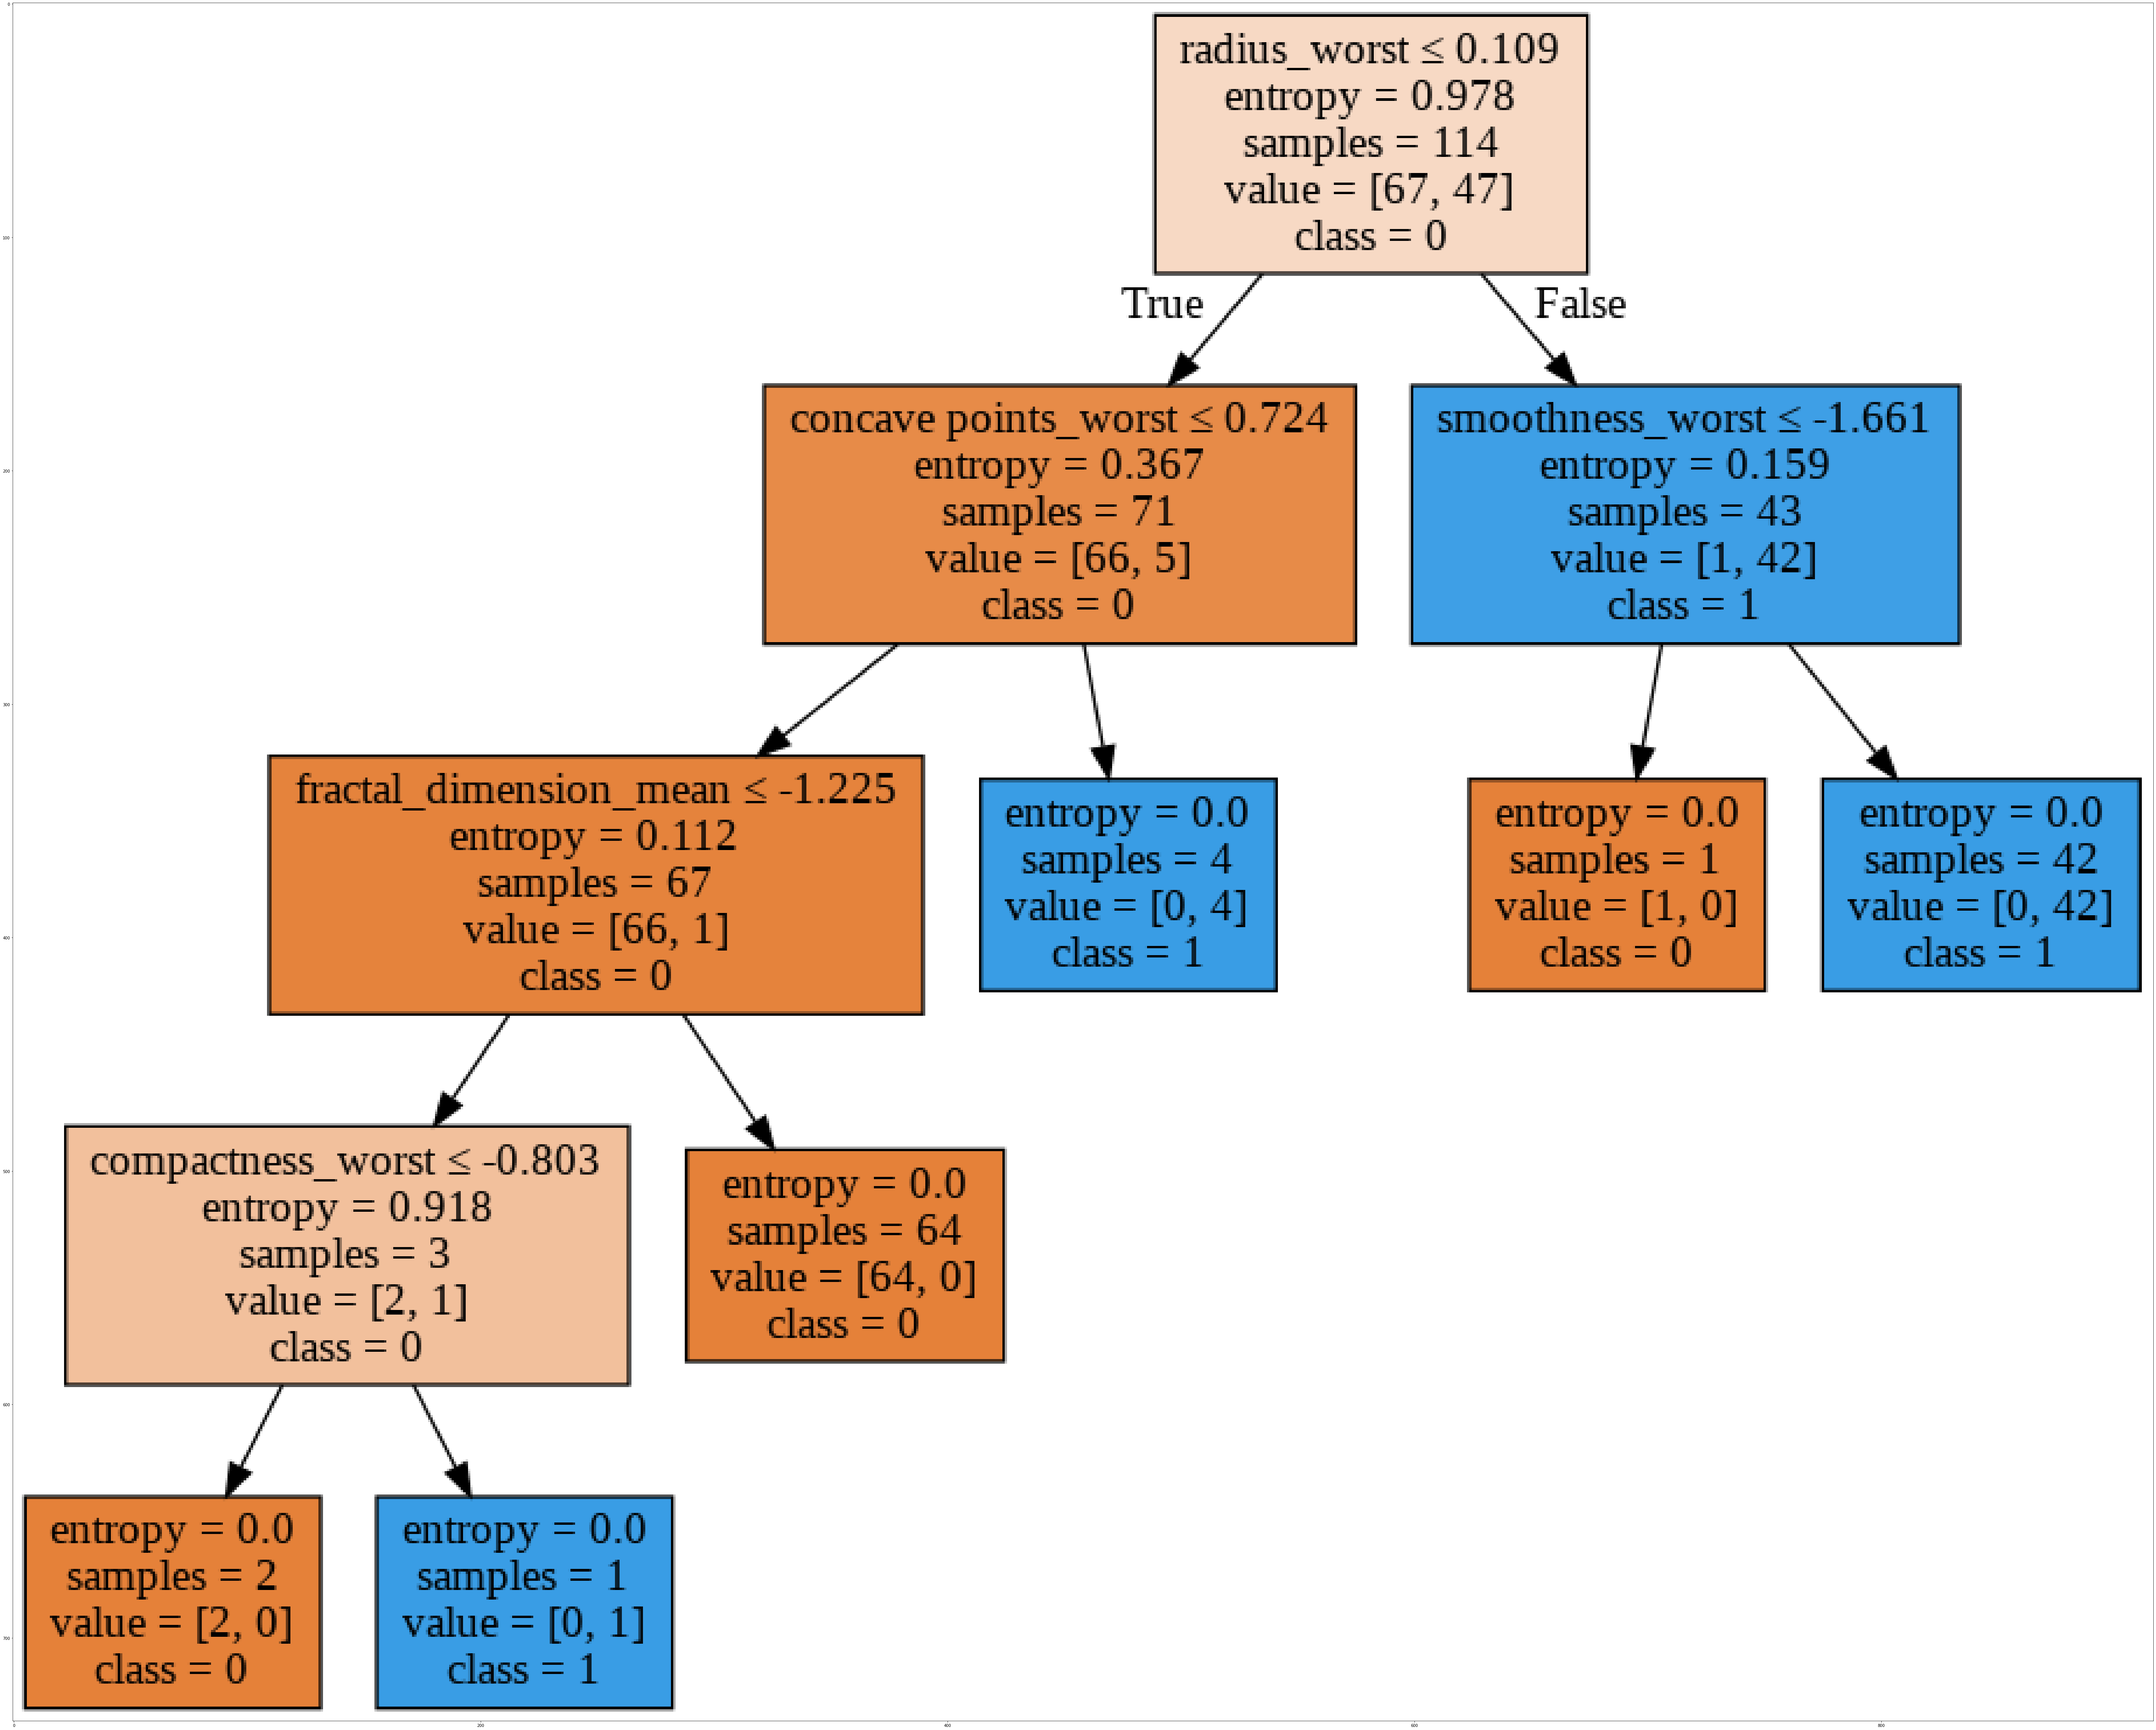

In [ ]:
dot_data = StringIO()
filename = "loantree.png"
featureNames = data.columns[1:]
targetNames = data["diagnosis"].unique().tolist()
out=tree.export_graphviz(DT_classifier,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

###DECISON TREE BAGGING

In [ ]:
from sklearn.ensemble import BaggingClassifier
Bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

In [ ]:
Bagging.fit(X_train, Y_train)
BPred = Bagging.predict(X_test)
print(Y_test, BPred)

['1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1'
 '1' '1' '1' '1' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '0' '1' '0' '0' '0' '1' '1' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '0' '1'
 '0' '1' '1' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1'
 '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0'
 '1' '1' '0' '1' '1' '0'] ['1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1'
 '1' '1' '1' '1' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1'
 '0' '1' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0' '0' '1' '1' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '1' '1'
 '0' '0' '1' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1'
 '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0'
 '0' '1' '0' '1' '1' '0']


In [ ]:
Bagging.score(X_test, Y_test)

0.9473684210526315

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[62  5]
 [ 3 44]]


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.98%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, predictions))

"""
Accuracy score 0.929825
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

Accuracy score 0.929825
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114



'\nAccuracy score 0.929825\n              precision    recall  f1-score   support\n\n           0       0.59      0.66      0.62        67\n           1       0.42      0.36      0.39        47\n\n    accuracy                           0.54       114\n   macro avg       0.51      0.51      0.51       114\nweighted avg       0.52      0.54      0.53       114\n'

###EXTRA TREE CLASSFIER

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ET_Classifier = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

ET_Classifier.fit(X_train, Y_train)
ET_Classifier.score(X_train, Y_train)

ETPred = ET_Classifier.predict(X_test)
ET_Classifier.score(X_test, Y_test)

0.9649122807017544

In [ ]:
Y_test, ET_Classifier.predict(X_test)

(array(['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0',
        '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0',
        '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1',
        '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1',
        '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0',
        '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0',
        '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
        '1', '0', '1', '0', '1', '1', '0', '1', '1', '0'], dtype=object),
 array(['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
        '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0',
        '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0',
        '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1',
        '1', '0', '0', '0', '0', '0', '0', '1', '1

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[62  5]
 [ 3 44]]


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.98%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, predictions))

"""
Accuracy score 0.929825
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

Accuracy score 0.929825
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114



'\nAccuracy score 0.929825\n              precision    recall  f1-score   support\n\n           0       0.59      0.66      0.62        67\n           1       0.42      0.36      0.39        47\n\n    accuracy                           0.54       114\n   macro avg       0.51      0.51      0.51       114\nweighted avg       0.52      0.54      0.53       114\n'

###RF

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(criterion='entropy', random_state=0)
RF_classifier.fit(X_train,Y_train)
Y_pred = RF_classifier.predict(X_test)
RF_classifier.score(X_test, Y_test)

0.9736842105263158

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[66  1]
 [ 2 45]]


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.37%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, predictions))

"""
Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114



'\nAccuracy score 0.973684\n              precision    recall  f1-score   support\n\n           0       0.59      0.66      0.62        67\n           1       0.42      0.36      0.39        47\n\n    accuracy                           0.54       114\n   macro avg       0.51      0.51      0.51       114\nweighted avg       0.52      0.54      0.53       114\n'

###GRADIANT DESCENT CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GBClassifier.fit(X_train, Y_train)

GBPred = GBClassifier.predict(X_test)
GBClassifier.score(X_test, Y_test)

0.9736842105263158

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, GBPred)
print(cm)

[[66  1]
 [ 2 45]]


In [ ]:
accuracy = accuracy_score(Y_test, GBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.37%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, GBPred))
print(classification_report(Y_test, predictions))

"""
Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114



'\nAccuracy score 0.973684\n              precision    recall  f1-score   support\n\n           0       0.59      0.66      0.62        67\n           1       0.42      0.36      0.39        47\n\n    accuracy                           0.54       114\n   macro avg       0.51      0.51      0.51       114\nweighted avg       0.52      0.54      0.53       114\n'

###XGBOOST

In [ ]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
import xgboost

XGBModel = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)
XGBModel.fit(X_train, Y_train , verbose=False)

XGB_pred = XGBModel.predict(X_test)

In [ ]:
XGBPred = []
for i in XGB_pred:
  for k in i:
    XGBPred.append(str(int(k)))

XGBPred = np.array(XGBPred)
XGBPred

array(['0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1',
       '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '1', '0', '0', '1'], dtype='<U1')

In [ ]:
accuracy = accuracy_score(Y_test, XGBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.37%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, XGBPred))
print(classification_report(Y_test, XGBPred))

"""
Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114
"""

Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



'\nAccuracy score 0.973684\n              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98        75\n           1       0.97      0.95      0.96        39\n\n    accuracy                           0.97       114\n   macro avg       0.97      0.97      0.97       114\nweighted avg       0.97      0.97      0.97       114\n'

###ADABOOST

In [ ]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADABoostClassifier = AdaBoostClassifier()
ADABoostClassifier.fit(X_train, Y_train)

ADAB_pred = ADABoostClassifier.predict(X_test)

In [ ]:
ADABPred = []
for i in ADAB_pred:
  for k in i:
    ADABPred.append(str(int(k)))

ADABPred = np.array(ADABPred)
ADABPred

array(['0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1',
       '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '1', '0', '0', '1'], dtype='<U1')

In [ ]:
accuracy = accuracy_score(Y_test, ADABPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.25%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, ADABPred))
print(classification_report(Y_test, ADABPred))

"""
Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114
"""

Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



'\nAccuracy score 0.982456\n              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99        75\n           1       1.00      0.95      0.97        39\n\n    accuracy                           0.98       114\n   macro avg       0.99      0.97      0.98       114\nweighted avg       0.98      0.98      0.98       114\n'

###CATBOOST

In [ ]:
!pip install catboost

In [ ]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from catboost import CatBoostClassifier
CatBoostClassifier = AdaBoostClassifier()
CatBoostClassifier.fit(X_train, Y_train)

CATB_pred = CatBoostClassifier.predict(X_test)

In [ ]:
CATBPred = []
for i in CATB_pred:
  for k in i:
    CATBPred.append(str(int(k)))

CATBPred = np.array(CATBPred)
CATBPred

array(['0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1',
       '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '1', '0', '0', '1'], dtype='<U1')

In [ ]:
accuracy = accuracy_score(Y_test, CATBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.25%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, CATBPred))
print(classification_report(Y_test, CATBPred))

"""
Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114
"""

Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



'\nAccuracy score 0.982456\n              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99        75\n           1       1.00      0.95      0.97        39\n\n    accuracy                           0.98       114\n   macro avg       0.99      0.97      0.98       114\nweighted avg       0.98      0.98      0.98       114\n'

###ANN

In [ ]:
!pip install tensorflow==2.2

  Using cached https://files.pythonhosted.org/packages/3d/be/679ce5254a8c8d07470efb4a4c00345fae91f766e64f1c2aece8796d7218/tensorflow-2.2.0-cp36-cp36m-manylinux2010_x86_64.whl
  Found existing installation: tensorflow 2.0.0b1
    Uninstalling tensorflow-2.0.0b1:
      Successfully uninstalled tensorflow-2.0.0b1


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow import keras

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test =sc_X.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(units = 30, activation = 'relu', input_shape=(30,)))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train.astype(np.float64), Y_train.astype(np.float64), batch_size = 30, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.8505
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.9253
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.9451
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.9473
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.1542 - accuracy: 0.9516
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.1304 - accuracy: 0.9604
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.9670
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9692
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.9780
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.9802

In [ ]:
Y_pred = model.predict(X_test)

#Array of list of list to Array of list
Y_new = []
for i in Y_pred:
  for k in i:
    Y_new.append(str(int(k)))
  
Y_new = np.array(Y_new, dtype = object) 

#PRINT
#Y_test, Y_new

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_new)
print(cm)

[[75  0]
 [ 4 35]]


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_new))
print(classification_report(Y_test, Y_new))

"""
CASE 1: 
Layer 1 : unit = 10
Layer 2 : unit = 5
Layer 3 : unit = 1
Batch_size = 10, nb_epoch = 100
Accuracy score 0.0.859649

CASE 2: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 10, nb_epoch = 100
Accuracy score 0.956140

CASE 3: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 15, nb_epoch = 100
Accuracy score 0.964912 

CASE 4: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 30, nb_epoch = 100
Accuracy score 0.964912 

CASE 5: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 30, nb_epoch = 1000
Accuracy score 0.964912 

CASE 6: 
Layer 1 : unit = 30
Layer 2 : unit = 20
Layer 3 : unit = 10
Layer 4 : unit = 1
Batch_size = 30, nb_epoch = 100
Accuracy score 0.964912 

CASE 7:
model = Sequential()
model.add(Dense(units = 30, activation = 'relu', input_shape=(30,)))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 30, nb_epoch = 1000)

Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.92      0.96        39

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

CASE 8:
model = Sequential()
model.add(Dense(units = 30, activation = 'relu', input_shape=(30,)))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 30, nb_epoch = 1000)


Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114
"""

Accuracy score 0.964912
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        75
           1       1.00      0.90      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



"\nCASE 1: \nLayer 1 : unit = 10\nLayer 2 : unit = 5\nLayer 3 : unit = 1\nBatch_size = 10, nb_epoch = 100\nAccuracy score 0.0.859649\n\nCASE 2: \nLayer 1 : unit = 30\nLayer 2 : unit = 15\nLayer 3 : unit = 1\nBatch_size = 10, nb_epoch = 100\nAccuracy score 0.956140\n\nCASE 3: \nLayer 1 : unit = 30\nLayer 2 : unit = 15\nLayer 3 : unit = 1\nBatch_size = 15, nb_epoch = 100\nAccuracy score 0.964912 \n\nCASE 4: \nLayer 1 : unit = 30\nLayer 2 : unit = 15\nLayer 3 : unit = 1\nBatch_size = 30, nb_epoch = 100\nAccuracy score 0.964912 \n\nCASE 5: \nLayer 1 : unit = 30\nLayer 2 : unit = 15\nLayer 3 : unit = 1\nBatch_size = 30, nb_epoch = 1000\nAccuracy score 0.964912 \n\nCASE 6: \nLayer 1 : unit = 30\nLayer 2 : unit = 20\nLayer 3 : unit = 10\nLayer 4 : unit = 1\nBatch_size = 30, nb_epoch = 100\nAccuracy score 0.964912 \n\nCASE 7:\nmodel = Sequential()\nmodel.add(Dense(units = 30, activation = 'relu', input_shape=(30,)))\nmodel.add(Dense(units = 15, activation = 'relu'))\nmodel.add(Dense(units = 1,

************************************************************************

###Deep Learning

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test =sc_X.transform(X_test)

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(units = 455, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(1024, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1024, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
/
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 455)               14105     
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              466944    
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_14 (Dense)             (None, 64)                65600     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 1,596,314
Trainable params: 1,596,314
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

checkpointer = ModelCheckpoint(filepath='weights.best.cnn.hdf5', verbose=1, save_best_only=True) 

In [ ]:
NN_model.fit(X_train.astype(np.float64), Y_train.astype(np.float64), epochs=1000, batch_size=30, validation_split = 0.2)# callbacks=callbacks_list)

Epoch 1/1000
13/13 [==============================] - 0s 34ms/step - loss: 0.1694 - mean_absolute_error: 0.1694 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108
Epoch 2/1000
13/13 [==============================] - 0s 22ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - val_loss: 0.0184 - val_mean_absolute_error: 0.0184
Epoch 3/1000
13/13 [==============================] - 0s 22ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096
Epoch 4/1000
13/13 [==============================] - 0s 22ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - val_loss: 0.0172 - val_mean_absolute_error: 0.0172
Epoch 5/1000
13/13 [==============================] - 0s 21ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - val_loss: 0.0231 - val_mean_absolute_error: 0.0231
Epoch 6/1000
13/13 [==============================] - 0s 22ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - val_loss: 0.0210 - val_mean_absolute_error: 0.0210
Epoch 7/10

In [ ]:
#NN_model.load_weights('weights.best.cnn.hdf5')

In [ ]:
#wights_file = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
#NN_model.load_weights(wights_file) 
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
DL_pred = model.predict(X_test)

#Array of list of list to Array of list
DLPred = []
for i in DL_pred:
  for k in i:
    DLPred.append(str(int(k)))
  
DLPred = np.array(DLPred, dtype = object) 

#PRINT
#Y_test, Y_new

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, DLPred)
print(cm)

[[75  0]
 [ 4 35]]


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, DLPred))
print(classification_report(Y_test, DLPred))

"""
CASE 1:
#The Input Later
NN_model.add(Dense(units = 100, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

#RESULT: 
Epoch 00500: val_loss did not improve from 0.00001
Accuracy score 0.964912

CASE 2:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(units = 455, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(200, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
/
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(X_train, Y_train, epochs=1000, batch_size=30, validation_split = 0.2, callbacks=callbacks_list)

Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.92      0.96        39

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

CASE 3:

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(units = 455, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(200, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(X_train, Y_train, epochs=1000, batch_size=30, validation_split = 0.2, callbacks=callbacks_list)

Epoch 01000: val_loss did not improve from 0.00000

Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114
"""

Accuracy score 0.964912
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        75
           1       1.00      0.90      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



"\nCASE 1:\n#The Input Later\nNN_model.add(Dense(units = 100, activation = 'relu', input_shape=(30,)))\n\n# The Hidden Layers :\nNN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))\nNN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))\n#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))\n\n# The Output Layer :\nNN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))\n\n#RESULT: \nEpoch 00500: val_loss did not improve from 0.00001\nAccuracy score 0.964912\n\nCASE 2:\nNN_model = Sequential()\n\n# The Input Layer :\nNN_model.add(Dense(units = 455, activation = 'relu', input_shape=(30,)))\n\n# The Hidden Layers :\nNN_model.add(Dense(200, kernel_initializer='normal',activation='relu'))\nNN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))\nNN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))\n\n# The Output Layer :\nNN_model.add(Dense(1, kernel_initializer='normal',activation='sig

###Discriminator Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dropout, Dense, UpSampling2D, Reshape
from keras.layers import Conv2DTranspose, Activation, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import RMSprop
from keras.datasets import cifar10

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt

from tqdm import tnrange
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
depth = 64
dropout = 0.4

In [ ]:
discriminator = Sequential()
classes = 10

discriminator.add(Conv2D(depth*1, 5, strides=2, input_shape=(30, 30, 1), padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(dropout))

discriminator.add(Conv2D(depth*2, 5, strides=2, padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(dropout))

discriminator.add(Conv2D(depth*4, 5, strides=2, padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(dropout))

discriminator.add(Conv2D(depth*8, 5, strides=1, padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(dropout))

discriminator.add(Flatten())
discriminator.add(Dense(classes + 1))
discriminator.add(Activation('softmax'))

discriminator.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 15, 15, 64)        1664      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 256)       

In [ ]:
# Otimizador
optimizer = RMSprop(lr=0.0001, decay=6e-8)

# Criação do Modelo
discriminator_model = Sequential()
discriminator_model.add(discriminator)

# Compilação
discriminator_model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [ ]:
#discriminator_model.fit(X_train.astype(np.float64), Y_train.astype(np.float64), batch_size = 10, epochs = 100)

###Generative Network

In [ ]:
# Hyperparâmetros
dropout = 0.4
depth = 64+64+64+64
dim = 8

In [ ]:
generator = Sequential()

generator.add(Dense(dim*dim*depth, input_dim=30))
generator.add(BatchNormalization(momentum=0.9))
generator.add(Activation('relu'))
generator.add(Reshape((dim, dim, depth)))
generator.add(Dropout(dropout))

generator.add(UpSampling2D())
generator.add(Conv2DTranspose(int(depth/2), 5, padding='same'))
generator.add(BatchNormalization(momentum=0.9))
generator.add(Activation('relu'))

generator.add(UpSampling2D())
generator.add(Conv2DTranspose(int(depth/4), 5, padding='same'))
generator.add(BatchNormalization(momentum=0.9))
generator.add(Activation('relu'))

generator.add(Conv2DTranspose(3, 5, padding='same'))
generator.add(Activation('sigmoid'))

generator.summary()

In [ ]:
"""# Optimizer
optimizer = RMSprop(lr=0.0004, clipvalue=1.0, decay=3e-8)

# Criação do Modelo
adversarial_model = Sequential()
adversarial_model.add(generator)
discriminator.trainable = False
adversarial_model.add(discriminator)

# Compilação do Modelo
adversarial_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
adversarial_model.summary()"""

In [ ]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

x_train = np.concatenate((x_train, x_test))
y_train = np.concatenate((y_train, y_test))

In [ ]:
def normalize(images):
    images=images.astype('float32')
    if images.max() > 1.0:
        images/=255.0
    return images

In [ ]:
def one_hot(labels):
    enc = OneHotEncoder()
    return enc.fit_transform(y_train).toarray()

In [ ]:
x_train = normalize(x_train)
y_train = one_hot(y_train)

In [ ]:
# Gerando noise randômico para os dados de entrada
def create_generator_noise(batch_size):
    noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
    sampling = np.random.randint(classes, size=batch_size)
    noise_labels = np.zeros((batch_size, classes))
    noise_labels[np.arange(batch_size), sampling] = 1
    noise_input = np.concatenate((noise, noise_labels), axis=1)
    
    return noise_input, noise_labels

In [ ]:
def create_generator_noise_by_label(labels):
    noise = np.random.uniform(-1.0, 1.0, size=[len(labels), 100])

    noise_labels = np.zeros((len(labels), classes))
    noise_labels[np.arange(len(labels)), labels] = 1
    noise_input = np.concatenate((noise, noise_labels), axis=1)
    
    return noise_input

In [ ]:
def train(batch_size=256, train_steps=2000):
    discriminator_losses = []
    adversarial_losses = []
    sample_images = []
    
    for i in tnrange(train_steps):
        # Seleciona uma amostra aleatória dos dados de treinamento e os rótulos
        sample_idx = np.random.randint(0, x_train.shape[0], size = batch_size)
        print(sample_idx.shape)
        images_train = x_train[sample_idx, : ]
        labels_train = y_train[sample_idx]
        labels_train = np.concatenate((labels_train, np.zeros(shape=(batch_size, 1))), axis=1)
        
        # Cria ruído no intervalo -1 a 1 e rótulos aleatórios como entrada para o gerador para gerar as imagens falsas
        noise_input, _ = create_generator_noise(batch_size)
        images_fake = generator.predict(noise_input)
        
        # Cria entrada por concatenar imagens reais e falsas e atribuindo os respectivos rótulos
        labels_fake = np.zeros(shape=(batch_size, classes + 1))
        labels_fake[:,-1] = 1
        
        input_data   = np.concatenate((images_train, images_fake))
        input_labels = np.concatenate((labels_train, labels_fake))

        discriminator_loss = discriminator_model.train_on_batch(input_data, input_labels)
        
        # Treina o modelo adversarial para gerar melhores imagens
        noise_input, noise_labels = create_generator_noise(batch_size)
        noise_labels = np.concatenate((noise_labels, np.zeros(shape=(batch_size, 1))), axis=1)
        
        adversarial_loss = adversarial_model.train_on_batch(noise_input, noise_labels)
        
        discriminator_losses.append(discriminator_loss)
        adversarial_losses.append(adversarial_loss)
        
        if i % 100 == 0:
            labels = [1]
            noise = create_generator_noise_by_label(labels)
            fake_images = generator.predict(noise)
            sample_images.append(fake_images[0])
    
    return discriminator_losses, adversarial_losses, sample_images

In [ ]:
# Training
discriminator_losses, adversarial_losses, sample_images  = train(train_steps=20000)